In [1]:
import pandas as pd 
import numpy as np 


In [4]:
df=pd.read_csv(r'D:\PW_Data_science\EDA\heart_failure_clinical_records_dataset.csv')

In [112]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [113]:
df.sample(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
125,43.0,1,358,0,50,0,237000.00,1.3,135,0,0,97,0
117,85.0,1,102,0,60,0,507000.00,3.2,138,0,0,94,0
172,70.0,1,171,0,60,1,176000.00,1.1,145,1,1,146,0
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1


# Features:

Age: The age of the patient (numeric).

Anaemia: Indicates the presence of anemia (binary: 0 for no, 1 for yes).

Creatinine Phosphokinase (CPK): Level of creatinine phosphokinase enzyme in the blood (numeric).

Diabetes: Indicates whether the patient has diabetes (binary: 0 for no, 1 for yes).

Ejection Fraction: Percentage of blood leaving the heart at each contraction (numeric).

High Blood Pressure: Indicates whether the patient has high blood pressure (binary: 0 for no, 1 for yes).

Platelets: Platelet count in the blood (numeric).

Serum Creatinine: Level of creatinine in the blood (numeric).

Serum Sodium: Level of sodium in the blood (numeric).

Sex: Gender of the patient (binary: 0 for female, 1 for male).

Smoking: Indicates whether the patient smokes (binary: 0 for no, 1 for yes).

Time: Follow-up period (in days) for the patient's condition (numeric)

# Exploring Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


looks like multiple categorical data present in encoded form so we can say that it is a classification problem 

## Duplicates 

In [9]:
df.duplicated().sum()

0

there is no  duplicate value in the data set

## Null values


In [11]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

There is no null value 

## Data Summary

In [15]:
df.describe().T.drop('count',axis= 1 ) # we checked count before 

,mean,std,min,25%,50%,75%,max
age,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


creatinine_phosphokinase have min 23 and max 7861 so the data rage is huge also the std is 970.287881. 
serum_creatinine also have a good range as value between 0.5 to 9.4 


# EDA

In [16]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from plotly import express as px 


## Univarient analysis to check data destribution and finding patterns in each features .

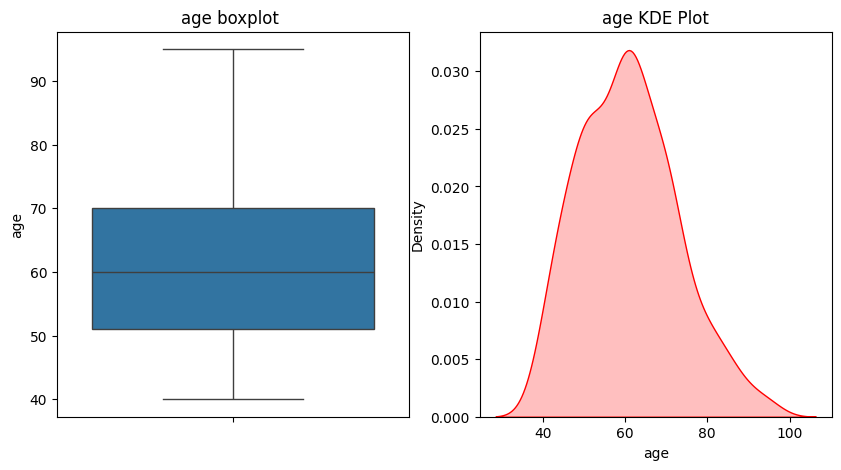

In [33]:
fig, (ax_box, ax_kde) =  plt.subplots(ncols=2, figsize=(10, 5))
sns.boxplot(df['age'],ax=ax_box)
sns.kdeplot(x=df['age'], color='red', ax=ax_kde, fill=True)

ax_box.set_title("age boxplot ")
ax_kde.set_title('age KDE Plot')
plt.show()

Age distribution is near to normal distribution with a slight right skue and the median is 60 


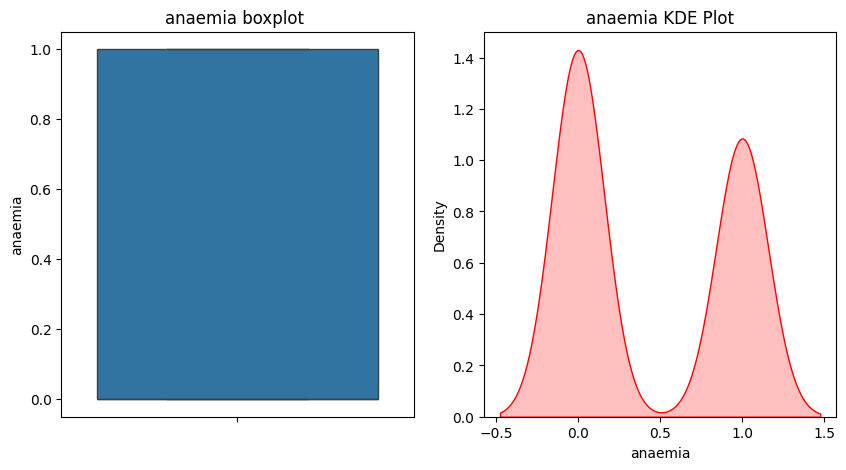

In [34]:
fig, (ax_box, ax_kde) =  plt.subplots(ncols=2, figsize=(10, 5))
sns.boxplot(df['anaemia'],ax=ax_box)
sns.kdeplot(x=df['anaemia'], color='red', ax=ax_kde, fill=True)

ax_box.set_title("anaemia boxplot ")
ax_kde.set_title('anaemia KDE Plot')
plt.show()

as anaemia feature tols us about the indivisual have anaemia or not for that reason it's kde plot is range between 0 ,1 and the number of person with no anaemia higher that number os patient with anaemia 

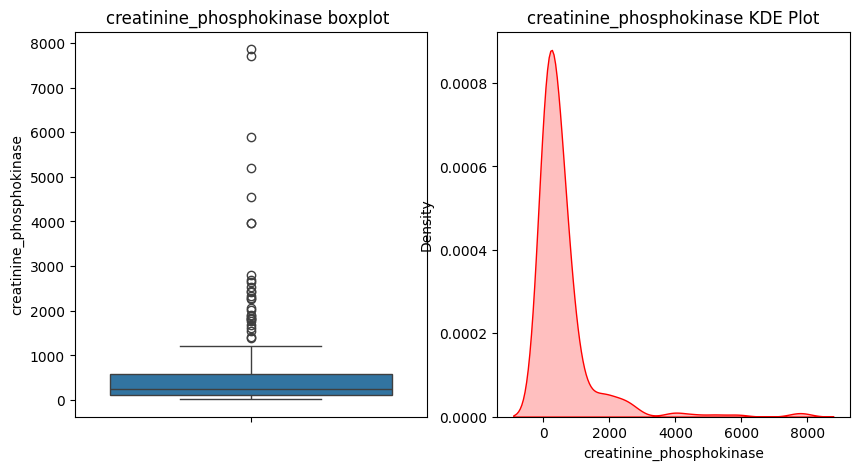

In [36]:
fig, (ax_box, ax_kde) =  plt.subplots(ncols=2, figsize=(10, 5))
sns.boxplot(df['creatinine_phosphokinase'],ax=ax_box)
sns.kdeplot(x=df['creatinine_phosphokinase'], color='red', ax=ax_kde, fill=True)

ax_box.set_title("creatinine_phosphokinase boxplot ")
ax_kde.set_title('creatinine_phosphokinase KDE Plot')
plt.show()

creatinine_phosphokinase is highly skewed data at the right side 

In [40]:
print('skewness',df['creatinine_phosphokinase'].skew()) # 
print ('kurtosis',df['creatinine_phosphokinase'].kurtosis()) # also kurtosis is above 3 that means leptokurtic 

skewness 4.463110084653752
kurtosis 25.1490461965808


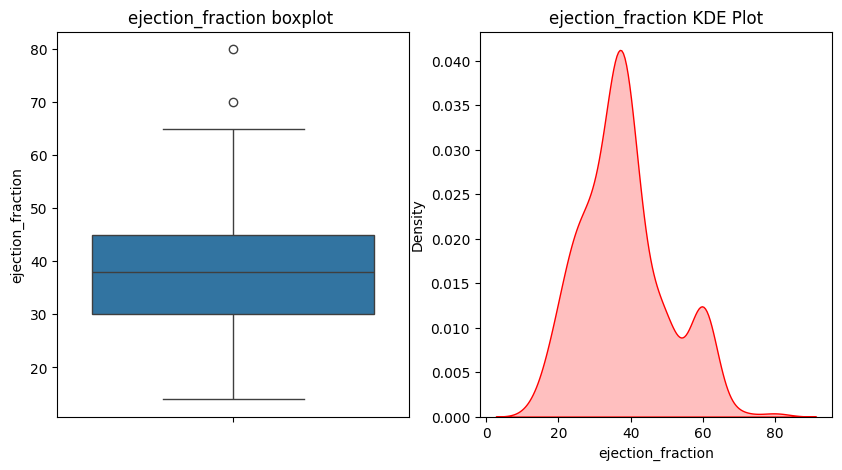

In [41]:
fig, (ax_box, ax_kde) =  plt.subplots(ncols=2, figsize=(10, 5))
sns.boxplot(df['ejection_fraction'],ax=ax_box)
sns.kdeplot(x=df['ejection_fraction'], color='red', ax=ax_kde, fill=True)

ax_box.set_title("ejection_fraction boxplot ")
ax_kde.set_title('ejection_fraction KDE Plot')
plt.show()

outliears are present in the ejection_fraction  

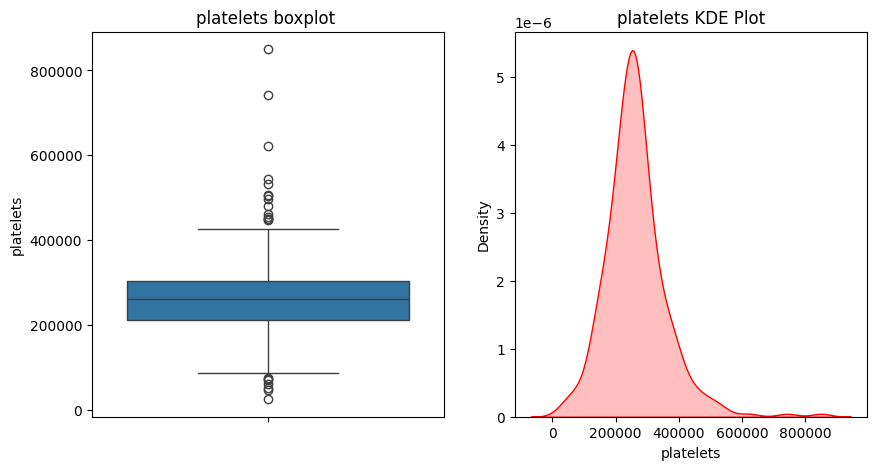

In [42]:
fig, (ax_box, ax_kde) =  plt.subplots(ncols=2, figsize=(10, 5))
sns.boxplot(df['platelets'],ax=ax_box)
sns.kdeplot(x=df['platelets'], color='red', ax=ax_kde, fill=True)

ax_box.set_title("platelets boxplot ")
ax_kde.set_title('platelets KDE Plot')
plt.show()

outliers are present and data is skewed . 


In [43]:
print('skewness',df['platelets'].skew()) # 
print ('kurtosis',df['platelets'].kurtosis()) # also kurtosis is above 3 that means leptokurtic 

skewness 1.4623208382757793
kurtosis 6.209254515302208


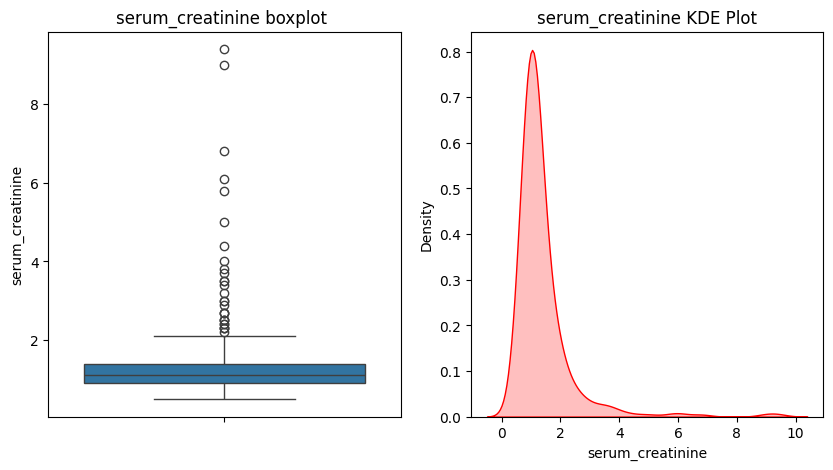

In [44]:
fig, (ax_box, ax_kde) =  plt.subplots(ncols=2, figsize=(10, 5))
sns.boxplot(df['serum_creatinine'],ax=ax_box)
sns.kdeplot(x=df['serum_creatinine'], color='red', ax=ax_kde, fill=True)

ax_box.set_title("serum_creatinine boxplot ")
ax_kde.set_title('serum_creatinine KDE Plot')
plt.show()

In [46]:
print('skewness',df['serum_creatinine'].skew()) # highly skewed
print ('kurtosis',df['serum_creatinine'].kurtosis()) # also kurtosis is above 3 that means leptokurtic 

skewness 4.455995882049026
kurtosis 25.828238661132016


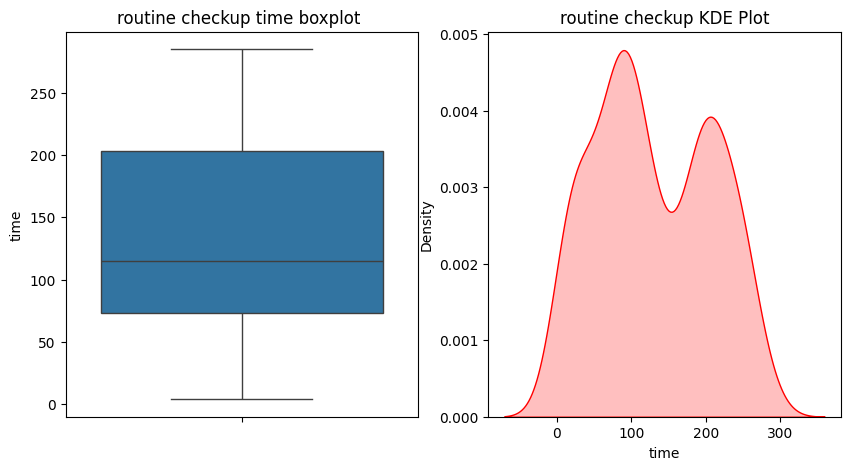

In [47]:
fig, (ax_box, ax_kde) =  plt.subplots(ncols=2, figsize=(10, 5))
sns.boxplot(df['time'],ax=ax_box)
sns.kdeplot(x=df['time'], color='red', ax=ax_kde, fill=True)

ax_box.set_title("routine checkup time boxplot ")
ax_kde.set_title('routine checkup KDE Plot')
plt.show()

## Bivariate Analysis

### What is the distribution of age among heart failure patients in the dataset

<Axes: xlabel='age', ylabel='Density'>

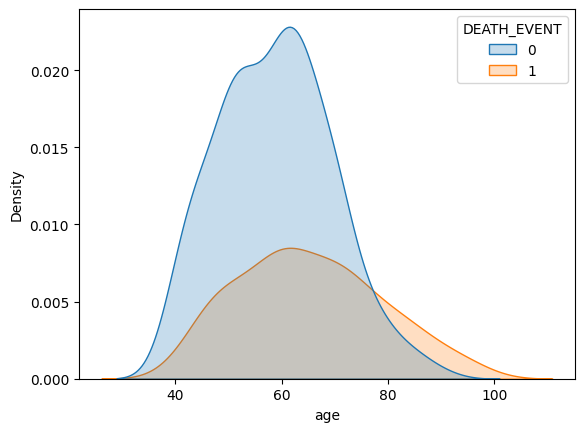

In [57]:
sns.kdeplot(x=df['age'],hue=df['DEATH_EVENT'],fill='PiBi')

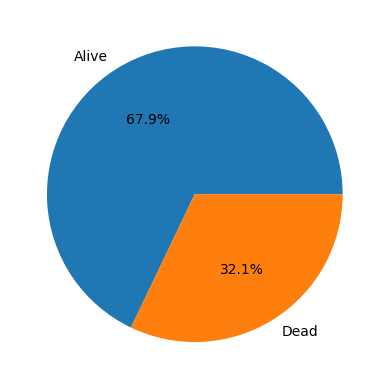

In [85]:

plt.pie(x=df.groupby('DEATH_EVENT').agg({'age':'count'}).age,labels=df.groupby('DEATH_EVENT').agg({'age':'count'}).reset_index().DEATH_EVENT.apply(lambda x: 'Dead' if x == 1 else "Alive")
        ,autopct='%1.1f%%')
plt.show()

How does the death rate vary with age ?


<Axes: xlabel='age', ylabel='DEATH_EVENT'>

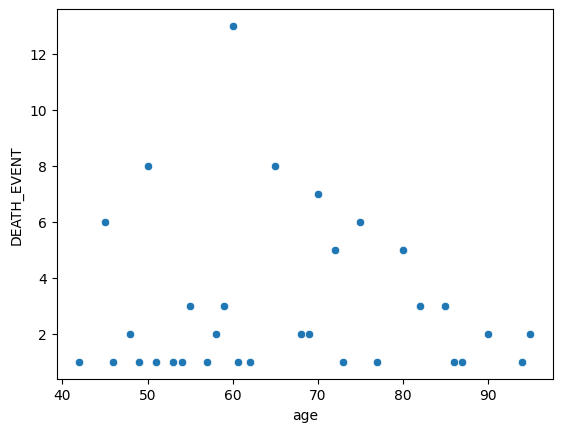

In [105]:
dead_age = df[df['DEATH_EVENT']==1][['age','DEATH_EVENT']]
dead_age=dead_age.groupby('age')['DEATH_EVENT'].count().reset_index()
sns.scatterplot(x=dead_age['age'],y=dead_age.DEATH_EVENT)

<Axes: xlabel='DEATH_EVENT', ylabel='age'>

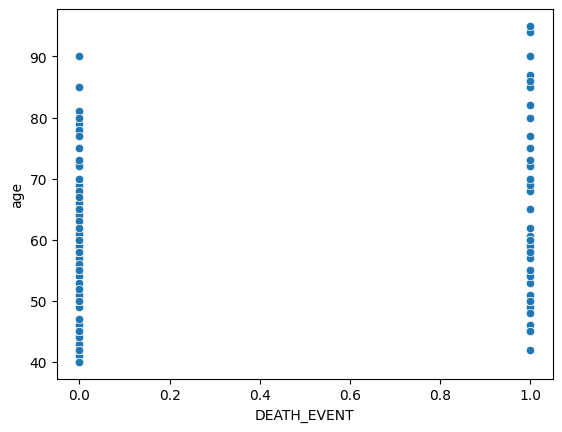

In [109]:
sns.scatterplot(y=df['age'],x=df['DEATH_EVENT'])

###  What is the percentage of male and female patients in the dataset?


In [135]:
df['sex'].value_counts(normalize=True)

sex
1    0.648829
0    0.351171
Name: proportion, dtype: float64

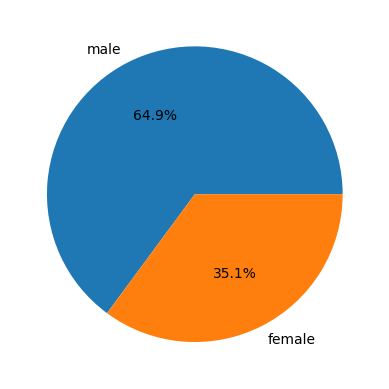

In [140]:
plt.pie(df['sex'].value_counts(normalize=True),labels=df['sex'].apply(lambda x: 'male' if x == 1 else "female").value_counts().index,autopct='%1.1f%%')
plt.show()

## Multivariate analysis

### platelets vs age 

In [179]:
df.groupby('age').agg({'platelets':['max','min','mean','count']})

platelets                                
              max        min           mean count
age                                              
40.000  303000.00  222000.00  262428.571429     7
41.000  374000.00  374000.00  374000.000000     1
42.000  365000.00  189000.00  244051.147143     7
43.000  237000.00  237000.00  237000.000000     1
44.000  263358.03  235000.00  249179.015000     2
45.000  850000.00  126000.00  331300.845263    19
46.000  348000.00  263358.03  294119.343333     3
47.000  130000.00  130000.00  130000.000000     1
48.000  244000.00   87000.00  165500.000000     2
49.000  427000.00  132000.00  286500.000000     4
50.000  404000.00   75000.00  257939.186296    27
51.000  406000.00  221000.00  290339.507500     4
52.000  382000.00  218000.00  307200.000000     5
53.000  418000.00  220000.00  291135.803000    10
54.000  264000.00  151000.00  207500.000000     2
55.000  451000.00  141000.00  272239.652353    17
56.000  133000.00  133000.00  133000.000000     1
57.000  395000.00  181000.00  288000.000000     2
58.000  504000.00  122000.00  245000.000000    10
59.000  362000.00   70000.00  238750.000000     4
60.000  454000.00   62000.00  249536.850303    33
60.667  389000.00  201000.00  295000.000000     2
61.000  282000.00  147000.00  231250.000000     4
62.000  283000.00  155000.00  231200.000000     5
63.000  448000.00   73000.00  255125.000000     8
64.000  309000.00  242000.00  265666.666667     3
65.000  497000.00  149000.00  257387.465000    26
66.000  242000.00  162000.00  202000.000000     2
67.000  263358.03  215000.00  239179.015000     2
68.000  305000.00  166000.00  247800.000000     5
69.000  266000.00  105000.00  199666.666667     3
70.000  533000.00   25100.00  258858.321200    25
72.000  621000.00  218000.00  316285.714286     7
73.000  263358.03  160000.00  211589.507500     4
75.000  368000.00  127000.00  254097.644545    11
77.000  406000.00  223000.00  314500.000000     2
78.000  481000.00  277000.00  379000.000000     2
79.000  172000.00  172000.00  172000.000000     1
80.000  388000.00  140000.00  233051.147143     7
81.000  231000.00  231000.00  231000.000000     1
82.000  321000.00   47000.00  189333.333333     3
85.000  507000.00  186000.00  306166.666667     6
86.000  263358.03  263358.03  263358.030000     1
87.000  262000.00  262000.00  262000.000000     1
90.000  390000.00  204000.00  273333.333333     3
94.000  263358.03  263358.03  263358.030000     1
95.000  461000.00  196000.00  328500.000000     2

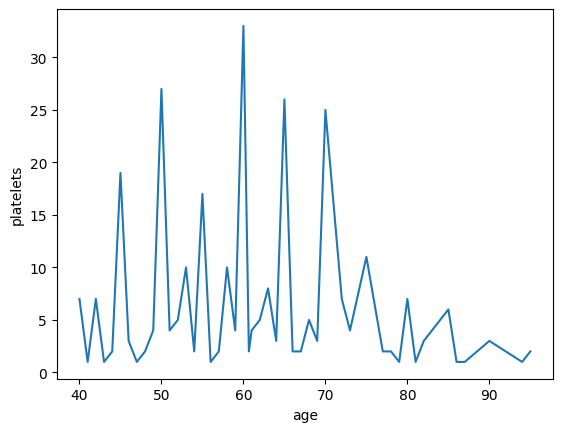

In [175]:
sns.lineplot(df.groupby('age')['platelets'].count())
plt.show()

<Axes: xlabel='age', ylabel='platelets'>

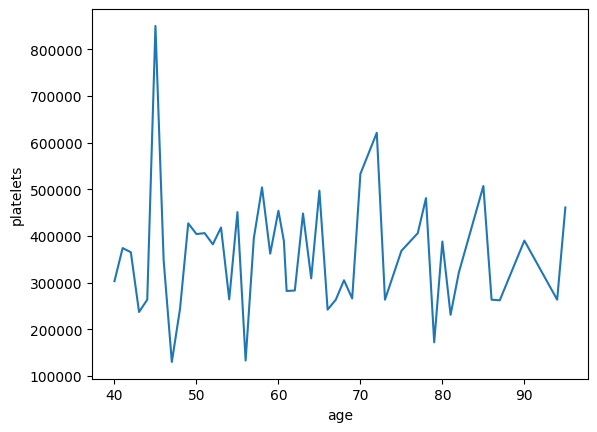

In [172]:
sns.lineplot(df.groupby('age')['platelets'].max())

<Axes: xlabel='age', ylabel='platelets'>

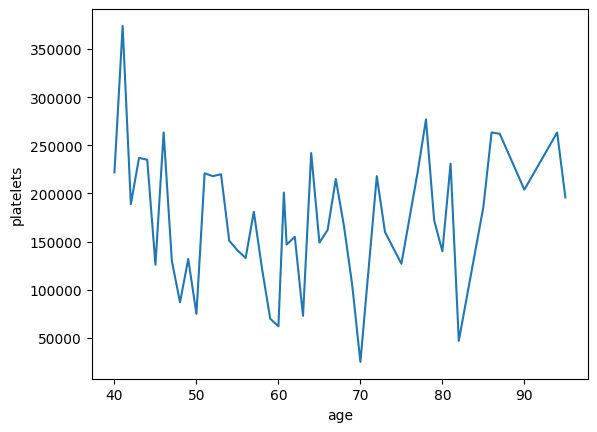

In [173]:
sns.lineplot(df.groupby('age')['platelets'].min())

<Axes: xlabel='age', ylabel='platelets'>

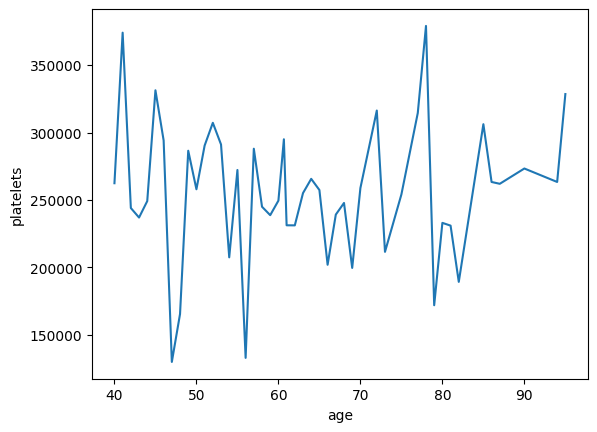

In [174]:
sns.lineplot(df.groupby('age')['platelets'].mean())

In [181]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<Axes: >

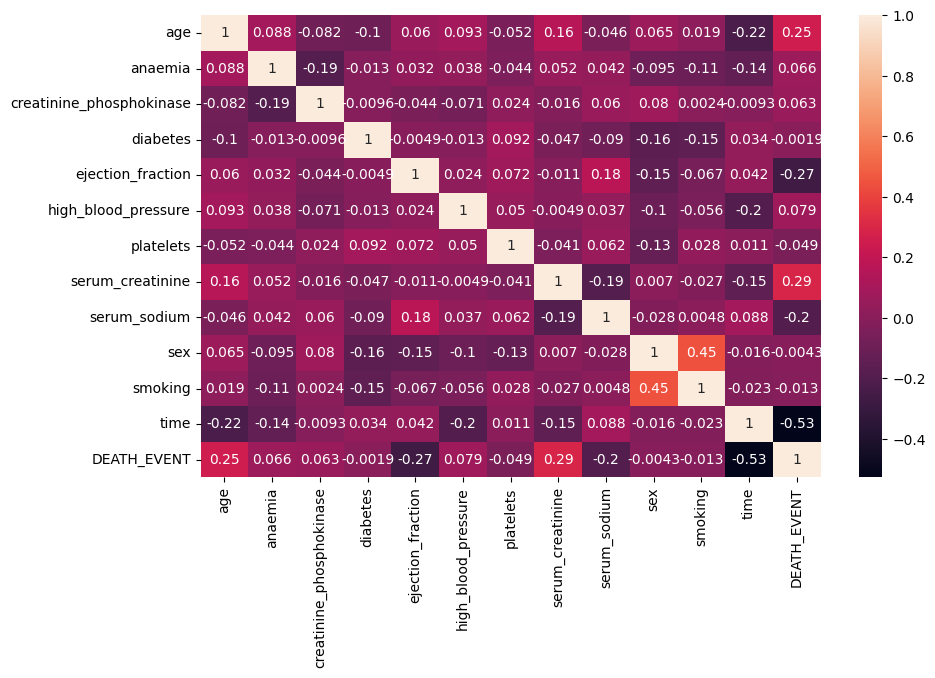

In [186]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),annot=True)

### Correlation between creatinine and sodium

<Axes: >

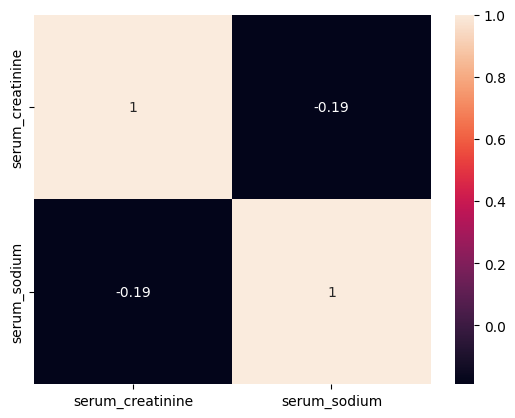

In [191]:
sns.heatmap(df[['serum_creatinine','serum_sodium']].corr(),annot=True)

there is no relation in creatinine and sodium 

### smocking and heartfailure 

In [210]:
k=df.groupby('smoking').agg({'DEATH_EVENT':['count','sum']})

In [211]:
k

DEATH_EVENT    
              count sum
smoking                
0               203  66
1                96  30

In [212]:
non_smo = 66/203*100
smo = 30/96*100

In [214]:
print(f'mortality rate for non smocker and have heart disease is 203 and 66 died percentage is : {non_smo} ')
print(f'mortality rate for non smocker and have heart disease is 96 and 30 died and percentage is : {smo}')
print('according to data smockers have less heart attack chances :( which cant be true ')


mortality rate for non smocker and have heart disease is 203 and 66 died percentage is : 32.51231527093596 
mortality rate for non smocker and have heart disease is 96 and 30 died and percentage is : 31.25
according to data smockers have less heart attack chances :( which cant be true 


In [205]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0
